In [0]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from PIL import Image

In [0]:
from tensorflow.keras.layers import Conv1D,Conv2D,Input,MaxPooling2D,Activation,Dense,Dropout,Conv2DTranspose
from tensorflow.keras.models import Model
import tensorflow as tf 

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!cp drive/'My Drive'/training.zip .

In [0]:
from zipfile import ZipFile
my = ZipFile("training.zip")
my.extractall()

In [0]:
background_color = np.array([0, 0, 255])

In [0]:
final_list = []
path1=r'/content/image_2'
path2= r'/content/gt_image_2'
for img1 in os.listdir(path1):
    img1_array = cv2.imread(os.path.join(path1,img1))
    new_image1 = cv2.resize(img1_array,(576,160))
    final_list.append(new_image1)

In [0]:
final_list2 = []
for img2 in os.listdir(path2):
    img2_array= cv2.imread(os.path.join(path2,img2))
    newimg2 = cv2.resize(img2_array,(576,160))
    gt_bg = np.all(newimg2 == background_color, axis=2)
    gt_bg = gt_bg.reshape(*gt_bg.shape,1)
    gt_image = np.concatenate((gt_bg,np.invert(gt_bg)),axis =2)
    final_list2.append(gt_image)

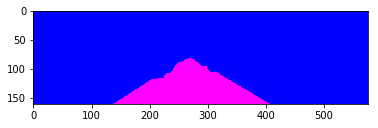

In [0]:
plt.imshow(newimg2)

In [0]:
final_list2[288][150][300]


array([False,  True])

In [0]:
newimg2[125][200]

array([255,   0, 255], dtype=uint8)

In [0]:
X=np.asarray(final_list)
y= np.asarray(final_list2)
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
X, y = shuffle(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [0]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(231, 160, 576, 3)
(231, 160, 576, 2)
(58, 160, 576, 3)
(58, 160, 576, 2)


In [0]:
y[1][159][200]

array([ True, False])

In [0]:
def model2(input_shape):
    input_x = Input(input_shape)
    X=Conv2D(64,3,strides = (1,1),padding = 'same',data_format = "channels_last" ,activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_1a")(input_x)
    X=Conv2D(64,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_1b")(X)
    X=MaxPooling2D((2,2), name = "fc_1c")(X)
    X=Conv2D(128,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_2a")(X)
    X=Conv2D(128,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_2b")(X)
    X=MaxPooling2D((2,2), name = "fc_2c")(X)
    X=Conv2D(256,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_3a")(X)
    X=Conv2D(256,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_3b")(X)
    X=Conv2D(256,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_3c")(X)
    fc_3d=MaxPooling2D((2,2), name = "fc_3d")(X)
    X=Conv2D(512,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_4a")(fc_3d)
    X=Conv2D(512,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_4b")(X)
    X=Conv2D(512,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_4c")(X)
    fc_4d=MaxPooling2D((2,2), name = "fc_4d")(X)
    X=Conv2D(512,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_5a")(fc_4d)
    X=Conv2D(512,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_5b")(X)
    X=Conv2D(512,3,strides = (1,1),padding = 'same',activation  = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_5c")(X)
    X=MaxPooling2D((2,2), name = "fc_5d")(X)
    X=Conv2D(4096,1,activation = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_6")(X)
    X=Dropout(0.5)(X)
    X=Conv2D(4096,1,activation = 'relu', use_bias  =True,kernel_initializer='glorot_uniform', name = "fc_7")(X)
    X=Dropout(0.5)(X)
    fc_8=Conv2D(2,1,strides = (1,1),activation ='relu' , use_bias = True,kernel_initializer='glorot_uniform', name = "fc_8")(X)
    fc_9=Conv2DTranspose(512,4,strides = (2,2),padding = 'same',activation ='relu',use_bias = True,kernel_initializer='glorot_uniform', name ="fc_9")(fc_8)
    fc_9_skip_connected  = tf.add(fc_9,fc_4d)
    fc_10=Conv2DTranspose(256,4,strides = (2,2) , padding = 'same' ,activation ='relu',use_bias = True,kernel_initializer='glorot_uniform', name = "fc_10")(fc_9_skip_connected)
    fc_10_skip_connected = tf.add(fc_10,fc_3d)
    X = Conv2DTranspose(2,16,strides = (8,8) , padding ='same',kernel_initializer='glorot_uniform', name = "fc_11")(fc_10_skip_connected)
    #X = tf.reshape(X,(289,-1,2))
    X = Activation('softmax')(X)
    model = Model(inputs = input_x,outputs = X,name = 'MyModel')
    return model

In [0]:
seg_model = model2(X_train[1].shape)
seg_model.compile(optimizer = "adam", loss = "binary_crossentropy",metrics = ["accuracy"])
seg_model.summary()

Model: "MyModel"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 160, 576, 3) 0                                            
__________________________________________________________________________________________________
fc_1a (Conv2D)                  (None, 160, 576, 64) 1792        input_4[0][0]                    
__________________________________________________________________________________________________
fc_1b (Conv2D)                  (None, 160, 576, 64) 36928       fc_1a[0][0]                      
__________________________________________________________________________________________________
fc_1c (MaxPooling2D)            (None, 80, 288, 64)  0           fc_1b[0][0]                      
____________________________________________________________________________________________

In [0]:
seg_model.fit(x = X_train,y = y_train, epochs =40 ,batch_size  = 64)

Epoch 1/40
231/231 [==============================] - 20s 88ms/sample - loss: 0.9494 - acc: 0.7050
Epoch 2/40
231/231 [==============================] - 7s 31ms/sample - loss: 0.5599 - acc: 0.7981
Epoch 3/40
231/231 [==============================] - 7s 31ms/sample - loss: 0.4621 - acc: 0.8076
Epoch 4/40
231/231 [==============================] - 7s 31ms/sample - loss: 0.4887 - acc: 0.8076
Epoch 5/40
231/231 [==============================] - 7s 31ms/sample - loss: 0.4227 - acc: 0.8076
Epoch 6/40
231/231 [==============================] - 7s 32ms/sample - loss: 0.3696 - acc: 0.8078
Epoch 7/40
231/231 [==============================] - 7s 32ms/sample - loss: 0.3528 - acc: 0.8071
Epoch 8/40
231/231 [==============================] - 7s 32ms/sample - loss: 0.3319 - acc: 0.8092
Epoch 9/40
231/231 [==============================] - 7s 32ms/sample - loss: 0.3237 - acc: 0.8283
Epoch 10/40
231/231 [==============================] - 7s 32ms/sample - loss: 0.3132 - acc: 0.8578
Epoch 11/40
231/23

In [0]:
preds = seg_model.evaluate(x = X_test,y =y_test)
print(preds[0])
print(preds[1])

58/58 [==============================] - 1s 13ms/sample - loss: 0.2327 - acc: 0.9006
0.23272501600199733
0.9006469


In [0]:
!cp drive/'My Drive'/um_000000.png .

In [0]:
x=cv2.imread('/content/um_000000.png')
x=final_list3[21]
x = np.expand_dims(x, axis=0)
a = seg_model.predict(x)
back2 = np.array([1,0])
ah = np.squeeze(a,axis=0)
ah = ah>0.5
ah = np.concatenate((ah,np.zeros((160,576,1))),axis = 2)
ah=ah*255
print(ah.shape)

W0727 10:33:01.367628 140081359226752 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


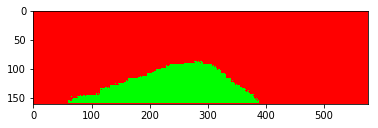

In [0]:
plt.imshow(ah)